In [3]:
#audio file formats       .mp3  .flac  .wav
import wave

In [4]:
#audio signal parameters
#number of channels  -mono   -stereo
#sample width 
#frame rate/sample rate 
#number of frames 
#value of a frame 
audio=wave.open("testaudio.wav","rb")


In [5]:
print("number of channels",audio.getnchannels())

number of channels 2


In [6]:
print("sample width",audio.getsampwidth())

sample width 2


In [7]:
print("frame rate", audio.getframerate())

frame rate 8000


In [8]:
print("number of frames", audio.getnframes())

number of frames 268237


In [9]:
print("parameters", audio.getparams())

parameters _wave_params(nchannels=2, sampwidth=2, framerate=8000, nframes=268237, comptype='NONE', compname='not compressed')


In [11]:
#time of audio
t_audio=audio.getnframes()/audio.getframerate()
print(t_audio)
frames=audio.readframes(-1)
audio.close

33.529625


<bound method Wave_read.close of <wave.Wave_read object at 0x000001CDDF4A48B0>>

In [15]:
#plotting the wave graph using mathplotlib
#converting audio to single channel to avoid x/y axis irregularities 

import numpy as np
import matplotlib.pyplot as plt
audio_plot=wave.open("testaudio-plot.wav","wb")
audio_plot.setnchannels(1)
audio_plot.setsampwidth(2)
audio_plot.setframerate(8000.0)
audio_plot.writeframes(frames)

audio_plot.close


Exception ignored in: <function Wave_write.__del__ at 0x000001CDDF4A8F70>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\wave.py", line 326, in __del__
    self.close()
  File "C:\ProgramData\Anaconda3\lib\wave.py", line 444, in close
    self._ensure_header_written(0)
  File "C:\ProgramData\Anaconda3\lib\wave.py", line 464, in _ensure_header_written
    raise Error('sample width not specified')
wave.Error: sample width not specified


<bound method Wave_write.close of <wave.Wave_write object at 0x000001CDDF4A4310>>

In [16]:
audio=wave.open("testaudio-plot.wav","rb")
sample_freq=audio.getframerate()
n_samples=audio.getnframes()
signal_wave = audio.readframes(-1)

In [17]:
audio.close


<bound method Wave_read.close of <wave.Wave_read object at 0x000001CDE1887E20>>

In [18]:
signal_array=np.frombuffer(signal_wave,  dtype=np.int16)
time=np.linspace(0, t_audio, num=n_samples)

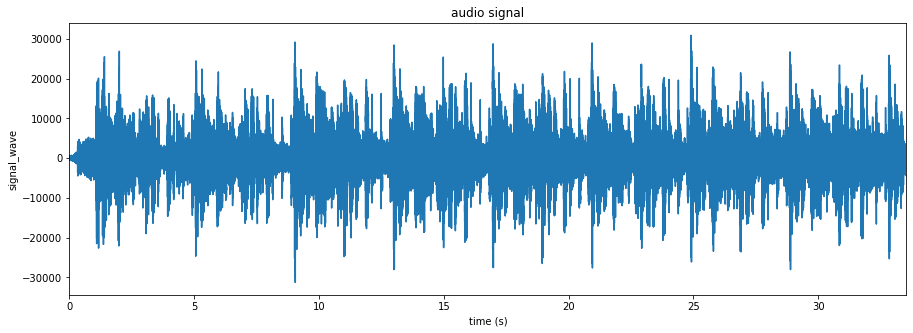

In [20]:
plt.figure(figsize=(15,5))
plt.plot(time,signal_array)
plt.title("audio signal")
plt.ylabel("signal_wave")
plt.xlabel("time (s)")
plt.xlim(0,t_audio)
plt.show()

In [21]:
import pyaudio

In [22]:
#recording audio through the microphone using python
#setting few basic parameters 
FRAMES_PER_BUFFER=3200
FORMAT=pyaudio.paInt16
CHANNELS=1
RATE=16000

In [24]:
p=pyaudio.PyAudio()
stream=p.open(format=FORMAT, channels=CHANNELS, rate=RATE, input=True, 
              frames_per_buffer=FRAMES_PER_BUFFER)
print("Start recording")

#deciding the lenth of audio
sec=5
frames=[]

#itterating and storing every frame with data
for i in range(0, int(RATE/FRAMES_PER_BUFFER*sec)):
    data= stream.read(FRAMES_PER_BUFFER)
    frames.append(data)
    
stream.stop_stream()
stream.close()
p.terminate()

#saving the audio file
output= wave.open("recording.wav","wb")
output.setnchannels(CHANNELS)
output.setsampwidth(p.get_sample_size(FORMAT))
output.setframerate(RATE)
output.writeframes(b"".join(frames))
output.close





Start recording


Exception ignored in: <function Wave_write.__del__ at 0x000001CDDF4A8F70>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\wave.py", line 326, in __del__
    self.close()
  File "C:\ProgramData\Anaconda3\lib\wave.py", line 444, in close
    self._ensure_header_written(0)
  File "C:\ProgramData\Anaconda3\lib\wave.py", line 464, in _ensure_header_written
    raise Error('sample width not specified')
wave.Error: sample width not specified


<bound method Wave_write.close of <wave.Wave_write object at 0x000001CDE64CB850>>